In [1]:
from torchsummary import summary
import matplotlib.pyplot as plt
from convModel import CONVClassifier
from utils import *

In [2]:
model = CONVClassifier()
summary(model, (1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Conv2d: 2-1                       [-1, 6, 24, 24]           156
|    └─Sigmoid: 2-2                      [-1, 6, 24, 24]           --
|    └─AvgPool2d: 2-3                    [-1, 6, 12, 12]           --
|    └─Conv2d: 2-4                       [-1, 16, 8, 8]            2,416
|    └─Sigmoid: 2-5                      [-1, 16, 8, 8]            --
|    └─AvgPool2d: 2-6                    [-1, 16, 4, 4]            --
|    └─Flatten: 2-7                      [-1, 256]                 --
|    └─Linear: 2-8                       [-1, 120]                 30,840
|    └─Sigmoid: 2-9                      [-1, 120]                 --
|    └─Linear: 2-10                      [-1, 84]                  10,164
|    └─Sigmoid: 2-11                     [-1, 84]                  --
|    └─Linear: 2-12                      [-1, 10]                  850
To

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Conv2d: 2-1                       [-1, 6, 24, 24]           156
|    └─Sigmoid: 2-2                      [-1, 6, 24, 24]           --
|    └─AvgPool2d: 2-3                    [-1, 6, 12, 12]           --
|    └─Conv2d: 2-4                       [-1, 16, 8, 8]            2,416
|    └─Sigmoid: 2-5                      [-1, 16, 8, 8]            --
|    └─AvgPool2d: 2-6                    [-1, 16, 4, 4]            --
|    └─Flatten: 2-7                      [-1, 256]                 --
|    └─Linear: 2-8                       [-1, 120]                 30,840
|    └─Sigmoid: 2-9                      [-1, 120]                 --
|    └─Linear: 2-10                      [-1, 84]                  10,164
|    └─Sigmoid: 2-11                     [-1, 84]                  --
|    └─Linear: 2-12                      [-1, 10]                  850
To

In [3]:
train, test = download_MNIST()
train_loader, test_loader = data_loaders(train, test, batch_size=64)

In [4]:
optimizer = adam_optimizer(model, lr=5e-4)
criterion = cross_entropy_loss()
num_epochs = 100

In [5]:
model, log_dict = train_model(model, train_loader, test_loader, optimizer, criterion, num_epochs)
torch.save(model, './models/convModel1.pth')

Epoch : 1/100


[1,   938] loss: 1.627, accuracy: 0.455
Epoch : 2/100
[2,   938] loss: 0.433, accuracy: 0.881
Epoch : 3/100
[3,   938] loss: 0.282, accuracy: 0.918
Epoch : 4/100
[4,   938] loss: 0.218, accuracy: 0.935
Epoch : 5/100
[5,   938] loss: 0.178, accuracy: 0.946
Epoch : 6/100
[6,   938] loss: 0.150, accuracy: 0.954
Epoch : 7/100
[7,   938] loss: 0.131, accuracy: 0.960
Epoch : 8/100
[8,   938] loss: 0.116, accuracy: 0.965
Epoch : 9/100
[9,   938] loss: 0.104, accuracy: 0.968
Epoch : 10/100
[10,   938] loss: 0.095, accuracy: 0.971
Epoch : 11/100
[11,   938] loss: 0.087, accuracy: 0.974
Epoch : 12/100
[12,   938] loss: 0.081, accuracy: 0.975
Epoch : 13/100
[13,   938] loss: 0.075, accuracy: 0.977
Epoch : 14/100
[14,   938] loss: 0.071, accuracy: 0.979
Epoch : 15/100
[15,   938] loss: 0.066, accuracy: 0.980
Epoch : 16/100
[16,   938] loss: 0.063, accuracy: 0.981
Epoch : 17/100
[17,   938] loss: 0.059, accuracy: 0.982
Epoch : 18/100
[18,   938] loss: 0.057, accuracy: 0.983
Epoch : 19/100
[19,   93

In [8]:
loaded_model = torch.load('./models/convModel1.pth')
model.load_state_dict(loaded_model.state_dict())

<All keys matched successfully>

In [9]:
train_losses = log_dict['train_loss_per_epoch']
train_accuracies = log_dict['train_accuracy_per_epoch']
val_losses = log_dict['test_loss_per_epoch']
val_accuracies = log_dict['test_accuracy_per_epoch']

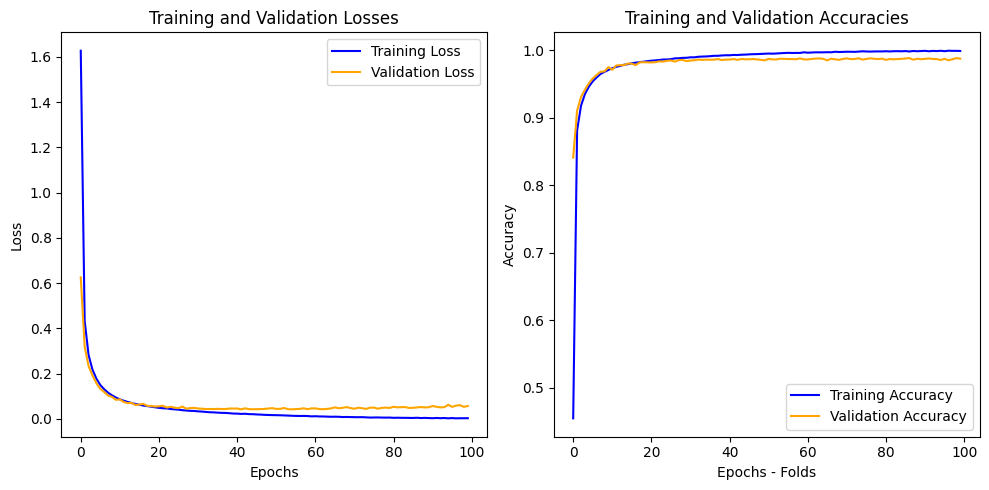

In [10]:
visualization(train_losses, train_accuracies, val_losses, val_accuracies)